$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 1** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Maximum likelihood estimation (MLE), Maximum a posteriori (MAP)**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Vasileios** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 16/4** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Maximilian Scholz, 920213 - 7759, scholzm@student.chalmers.se** <br />

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

# Theoretical problems

## [Maximum likelihood estimator (MLE), 4 points]

Consider a dataset $x_1, \ldots, x_n$ consisting of i.i.d. observations 
generated from a **spherical** multivariate Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu \in \mathbb{R}^p$, $I$ 
is the $p \times p$ identity matrix, and $\sigma^2$ is a
scalar. Derive the maximum likelihood estimator for $\sigma$.

### Solution
The pdf of the multivariate gaussian distribution can can be given with:
$$ P(X \,=\, x \,|\, \mu, \Sigma) =  \frac{1}{ (2\pi)^{p/2}\, |\Sigma|^{1/2}} \exp \left( -\frac{1}{2} (x - \mu)^{\top}\, \Sigma^{-1} (x - \mu) \right)
~.$$
with $\Sigma = \sigma^2I$

As the dataset consists of i.i.d. observations, the joined likelyhood function is the product of the individual likelyhood functions:

$$ L(X=\{x_i\}\ |\ \mu, \Sigma) = \prod_{n=1}^{N} P(X = x_i\ |\ \mu, \Sigma^{2})$$

Instead of maximising the joined likelyhood function, we can maximise the natural logarithm of it as both have their minima and maxima at the same values. This removes the exponential function. Finally, as the logarithm of a product is the sum of the individual logarithms, we can use the following:

$$\hat{\mu}, \hat{\Sigma} = arg \ \max\limits_{\mu, \Sigma} \sum_{i=1}^{N} ln[p(x_i \ | \ \mu, \Sigma)]$$
We ignore the constant terms, as they don't influence the result and turn the signs to make a minimizing problem:
$$\hat{\mu}, \hat{\Sigma} = arg \ \min\limits_{\mu, \Sigma} \sum_{i=1}^{N} \left [ \frac{1}{2} \cdot (x_i - \mu)^T \cdot \Sigma^{-1} \cdot (x_i - \mu) + \frac{1}{2} \cdot \ln|\Sigma|\right ]$$

With $\Sigma = \sigma^2I$ and $|\Sigma|=\sigma^{2P}$ this becomes:

$$\frac{1}{2} \cdot \sum_{i=1}^{N} \left [ (x_i - \mu)^T \cdot (\sigma^2I)^{-1} \cdot (x_i - \mu) + \ln\left(\sigma^{2P}\right) \right ] = \frac{1}{2} \cdot \left ( \sum_{i=1}^{N} \left [ (x_i - \mu)^T \cdot (\sigma^2I)^{-1} \cdot (x_i - \mu) \right ] + N \cdot \ln\left(\sigma^{2P}\right) \right )$$
$$= \frac{1}{2\sigma^2} \cdot \sum_{i=1}^{N} \left [ (x_i - \mu)^T \cdot I^{-1} \cdot (x_i - \mu) \right ] + \frac{NP}{2} \cdot \ln\left(\sigma^2\right)$$

To get the maximum, we set the derivative to 0:

$$0 = \frac{1}{2\sigma^2} \cdot \sum_{i=1}^{N} (x_i - \mu)^T \cdot I^{-1} \cdot (x_i - \mu) + \frac{NP}{2} \cdot \ln\left(\sigma^2\right) \ \ \  \frac{d}{d\sigma}$$

This becomes:

$$0 = -\sigma^{-3} \cdot \sum_{i=1}^{N} (x_i - \mu)^T \cdot I^{-1} \cdot (x_i - \mu) + \frac{NP}{2\sigma^2} \cdot 2\sigma$$

$$-\sigma^{-3} \cdot \sum_{i=1}^{N} (x_i - \mu)^T \cdot I^{-1} \cdot (x_i - \mu) = \frac{NP}{2\sigma^2} \cdot 2\sigma$$

$$\sigma^2 = \frac{\sum_{i=1}^{N} (x_i - \mu)^T \cdot I^{-1} \cdot (x_i - \mu)}{NP}$$

$$\sigma = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \mu)^T \cdot I^{-1} \cdot (x_i - \mu)}{NP}}$$


## [Posterior distributions, 6 points]

Consider dataset $x_1, \ldots, x_n $ consisting of i.i.d. observations 
generated from a **spherical** multivariate Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu =
[\mu_{1},\, \mu_{2}]^{\top} \in \mathbb{R}^2$, $I$ 
is the $2 \times 2$ identity matrix, and $\sigma^2$ is a scalar. 
The probability distribution of a point $\mathbf{x}=[x_{1},\, x_{2}]^{\top}$ is given by

$$ P(X = x \,|\, \sigma^{2}) =  \frac{1}{ 2\pi \sigma^2}   \exp
\left( -\frac{ (x - \mu)^{\top}(x - \mu) }{2\sigma^{2}} \right)
~.$$

We assume that $\sigma^{2}$ has an **inverse-gamma** prior distribution
given by
$$ P(\sigma^{2} = s | \alpha, \beta) =
\frac{\beta^{\alpha}}{\Gamma(\alpha)} s^{-\alpha-1} \exp\left( -
  \frac{\beta}{s}\right)~. \tag{1} $$
  
where $\alpha$ and $\beta$ are parameters and $\Gamma(\cdot)$ is the
gamma function given by $\Gamma(x) = \int_{0}^{\infty} t^{x-1} e^{-t}
dt $.

1. Derive the posterior distribution $p(\sigma^{2} = s | x_{1} , \ldots, x_{n}; \alpha, \beta)$. (HINT: inverse-gamma distribution is conjugate prior to sphericalGaussian distribution when mean is known).

2. Assume $\mu$ is known and consider two separate models (having different parameters)

    * $\alpha =1$ and $\beta=1$ (Model $M_{A}$)
    * $\alpha = 10$ and $\beta= 1$ (Model $M_{B}$) 

Compute analytically the expression for the MAP estimate for both models in terms of posterior parameters referred to as $\alpha_{1}, \beta_{1}$.

# Practical problems

**Useful python libraries/functions:**
* **General:**  shape, reshape, np.mean etc.
* **Plotting:** plot, scatter, legend, hold, imshow, subplot,
  grid, title etc.

## [Spherical Gaussian estimation, 5 points]

Consider a dataset consisting of i.i.d. observations
generated from a spherical Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu \in \mathbb{R}^p$, $I$ 
is the $p \times p $ identity matrix, and $\sigma^2$ is a scalar.

(a) Write the mathematical expression for the MLE estimators for $\mu$ and $\sigma$ in above setup. (HINT: Use latex equations here, or mention in pdf. This [link](http://data-blog.udacity.com/posts/2016/10/latex-primer/) might be useful if you choose to write here).

(b) Implement a function **sge()** that estimates the mean $\mu$ and variance $\sigma^{2}$ from the given data, using the skeleton code provided below. Note: You cannot use **numpy.cov** and **numpy.mean** or any other functions for calculating the mean and variance.

(c) Implement a function **myplot1()** which takes as input a two-dimensional dataset $x$ (as described above); and draws, on the same plot, the following:
1. A scatter plot of the original data $x$, 
2. Circles with center $\mu$ and radius $r=k \sigma$ for $k=1, 2, 3$ where $\mathbf{\mu}$ and $\sigma^{2}$ denote the mean and variance estimated using **sge()**. 
3. Legend for each circle indicating the fraction of points (in the original dataset) that lie outside the circle boundary.

(d) Load 'dataset0.txt' and run your code using only the first two features of the dataset. Submit the resulting plot as well as your implementation here.

In [15]:
import numpy as np
def sge(X):
    """
    SGE Mean and variance estimator for spherical Gaussian distribution

    X : Data matrix of size n x p where each row represents a p-dimensional data point
    e.g. X = [ 2 1 ; 3 7 ; 4 5 ] is a dataset having 3 samples having two co−ordinates each.
    mu : Estimated mean o f the dataset [mu_1 mu_2 . . . mu_p]
    sigma : Estimated standard deviation of the dataset ( number )
    """
    
    mu = [sum([row[i] for row in X])/len(X) for i in range(len(X[0]))]
    
    X_array = np.asarray(X)
    sse = 0
    
    
    for i in range(len(X_array)):
        sse += (np.transpose(X_array[i] - mu) * np.identity(len(X_array[0])) * (X_array[i] - mu))

    sigma2 = (sse[0][0] + sse[1][1]) / (len(X_array)*len(X_array[0]))
    
    return mu,sigma2


In [6]:
import numpy as np
data = []                                                                            
with open('dataset.txt') as file:
    for line in file.readlines():
        data.append([int(foo) for foo in line.split()])
    mu, sigma = sge([[row[0],row[1]] for row in data])
print('sigma')
print(sigma)
print('np.sigma')
print(np.std([[row[0],row[1]] for row in data], axis=0))

20199739.326815624
sigma
96.9740969436341
np.sigma
[117.70552771  70.38010872]


(0, 1000)

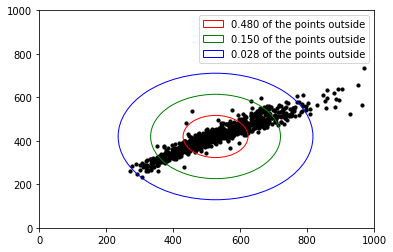

In [16]:
%matplotlib inline   
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

def hitbox(data, mu, sigma):
    count = 0
    for measure in data:
         if np.sqrt(pow(measure[0] - mu[0],2) + pow(measure[1] - mu[1],2)) > sigma:
                count += 1
    
    return count/len(data)

# Data = np.array([[2, 1], [3, 7], [4, 5]])

# Data = []                                                                            
# with open('./data/dataset0.txt') as file:
#     for line in file.readlines():
#         Data.append([int(foo) for foo in line.split()])
data = []                                                                            
with open('dataset.txt') as file:
    for line in file.readlines():
        data.append([int(foo) for foo in line.split()])
            

mu, sigma2 = sge([[row[0],row[1]] for row in data])
sigma = np.sqrt(sigma2)

x0 = np.array(data)[:, 0]
x1 = np.array(data)[:, 1]

fig, ax = plt.subplots()

plt.scatter(x0, x1, s=10, c='black')

c1 = matplotlib.patches.Circle([mu[0], mu[1]], sigma, fill=False, color='r')
c2 = matplotlib.patches.Circle([mu[0], mu[1]], 2*sigma, fill=False, color='g')
c3 = matplotlib.patches.Circle([mu[0], mu[1]], 3*sigma, fill=False, color='b')

ax.add_artist(c1)
ax.add_artist(c2)
ax.add_artist(c3)

plt.legend(
    [c1, c2, c3], 
    ['{:1.3f} of the points outside'.format(hitbox(np.asarray(data)[:,0:2], mu, sigma)), 
     '{:1.3f} of the points outside'.format(hitbox(np.asarray(data)[:,0:2], mu, 2*sigma)),
     '{:1.3f} of the points outside'.format(hitbox(np.asarray(data)[:,0:2], mu, 3*sigma)) 
    ])

ax.set_xlim((0, 1000))
ax.set_ylim((0, 1000))

## [MAP estimation, 5 points]

Consider dataset $x_1, \ldots, x_n $ consisting of i.i.d. observations 
generated from a multivariate normal distribution $N(\mu, \sigma^2I)$, where $\mu =
[\mu_{1},\, \mu_{2}]^{\top} \in \mathbb{R}^2$, $I$ 
is the $2 \times 2$ identity matrix, and $\sigma^2$ is a scalar. We will now explore the Bayesian approach to estimation of $\sigma^{2}$ *under the assumption that the mean $\mu$ is known.*
The probability distribution of a point $\mathbf{x}=[x_{1},\, x_{2}]^{\top}$ is given by

$$ P(X = x \,|\, \sigma^{2}) =  \frac{1}{ 2\pi \sigma^2}   \exp
\left( -\frac{ (x - \mu)^{\top}(x - \mu) }{2\sigma^{2}} \right)
~.$$

We assume that $\sigma^{2}$ has an **inverse-gamma** prior distribution
given by
$$ P(\sigma^{2} = s | \alpha, \beta) =
\frac{\beta^{\alpha}}{\Gamma(\alpha)} s^{-\alpha-1} \exp\left( -
  \frac{\beta}{s}\right)~. \tag{1} $$
  
where $\alpha$ and $\beta$ are parameters and $\Gamma(\cdot)$ is the
gamma function given by $\Gamma(x) = \int_{0}^{\infty} t^{x-1} e^{-t}
dt $.

Assume that your dataset now consists of just the first two features of 'dataset0.txt'.

(a) Choose $\mu$ to be the empirical mean. Implement a function **myplot2()**, that on the same plot, shows the prior and posterior distributions for $\sigma$ with parameters $\alpha = 1 $ and $\beta = 1$.  Generate a second plot with $\alpha=10$ and $\beta=1$. What do you observe?

HINT:
   * Calculate the posterior distribution using the data and the formula that you derived in the theoretical question **"Posterior distributions"**.
   * You might want to check out the "log-sum-exp trick".